<a href="https://colab.research.google.com/github/kanakesh2006/Crop_Recommendation_System/blob/main/Crop_Recommendation_System_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crop Recommendation

Maximize agricultural yield by recommending appropriate crops



Kaggle Dataset link : https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset

Github Repo link :

#### Import Dataset through Kaggle (upload kaggle.json)

In [4]:
!pip install -q kaggle

from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [5]:
dataset_name = 'atharvaingle/crop-recommendation-dataset'

!kaggle datasets download -d {dataset_name}

import os
zip_file_name = dataset_name.split('/')[-1] + '.zip'

!unzip -q {zip_file_name}

!rm {zip_file_name}

!ls

Dataset URL: https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset
License(s): apache-2.0
  0% 0.00/63.7k [00:00<?, ?B/s]
100% 63.7k/63.7k [00:00<00:00, 284MB/s]
Crop_recommendation.csv  kaggle.json  sample_data


## Exploratory Data Analysis

In [6]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/Crop_recommendation.csv")

In [7]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [8]:
df.sample(3)

,N,P,K,temperature,humidity,ph,rainfall,label
1562,6,124,200,22.982081,93.845050,5.971332,109.585225,apple
1262,32,130,196,40.660123,81.249960,6.372960,74.030301,grapes
1152,37,36,27,27.552974,47.908591,5.910635,90.403327,mango


In [9]:
df.shape

(2200, 8)

In [10]:
# Dataset overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [11]:
# Check for missing values
print(df.isnull().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [12]:
# checking the duplicated values in dataset
df.duplicated().sum()

np.int64(0)

In [13]:
# Basic statistics
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [14]:
# Number of unique crops
print("Number of unique crops:", df['label'].nunique())
print("Crops:", df['label'].unique())

Number of unique crops: 22
Crops: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


/tmp/ipython-input-2619135671.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', order=df['label'].value_counts().index, palette="viridis")


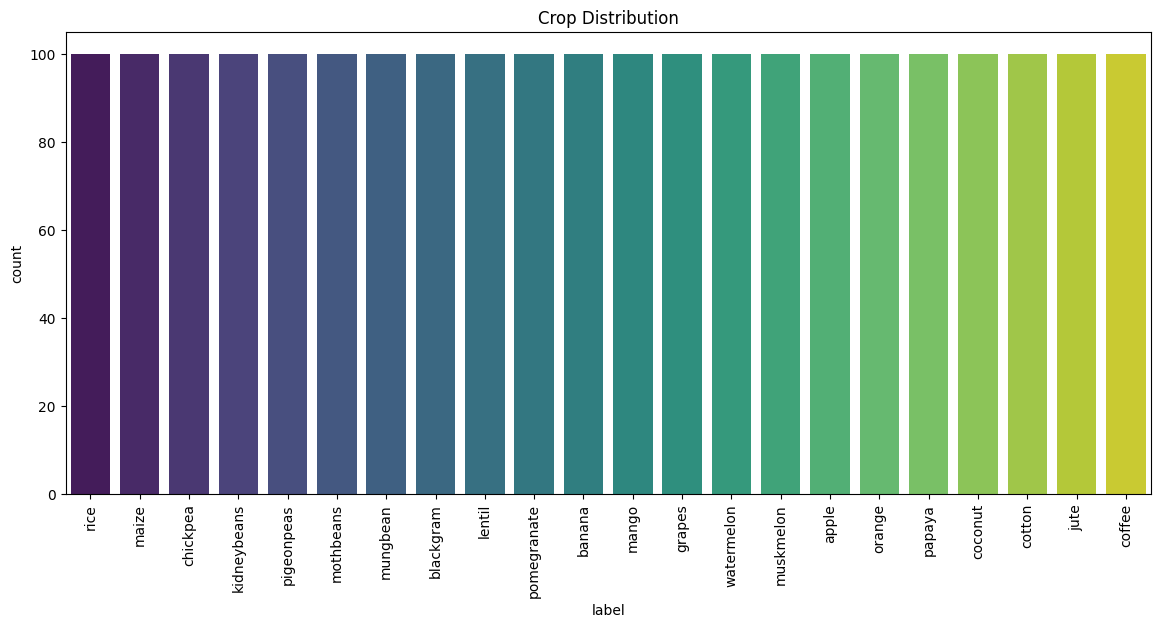

In [15]:
# Count of each crop
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='label', order=df['label'].value_counts().index, palette="viridis")
plt.xticks(rotation=90)
plt.title("Crop Distribution")
plt.show()

From the crop distribution plot, we can see the following insights:

* **Balanced Dataset**: The plot shows that the dataset is remarkably balanced. Each of the 22 unique crop types has exactly 100 data points.
* **Equal Representation**: This equal representation of each crop type is ideal for training a classification model, as it prevents the model from being biased towards any particular crop due to an uneven distribution of data.

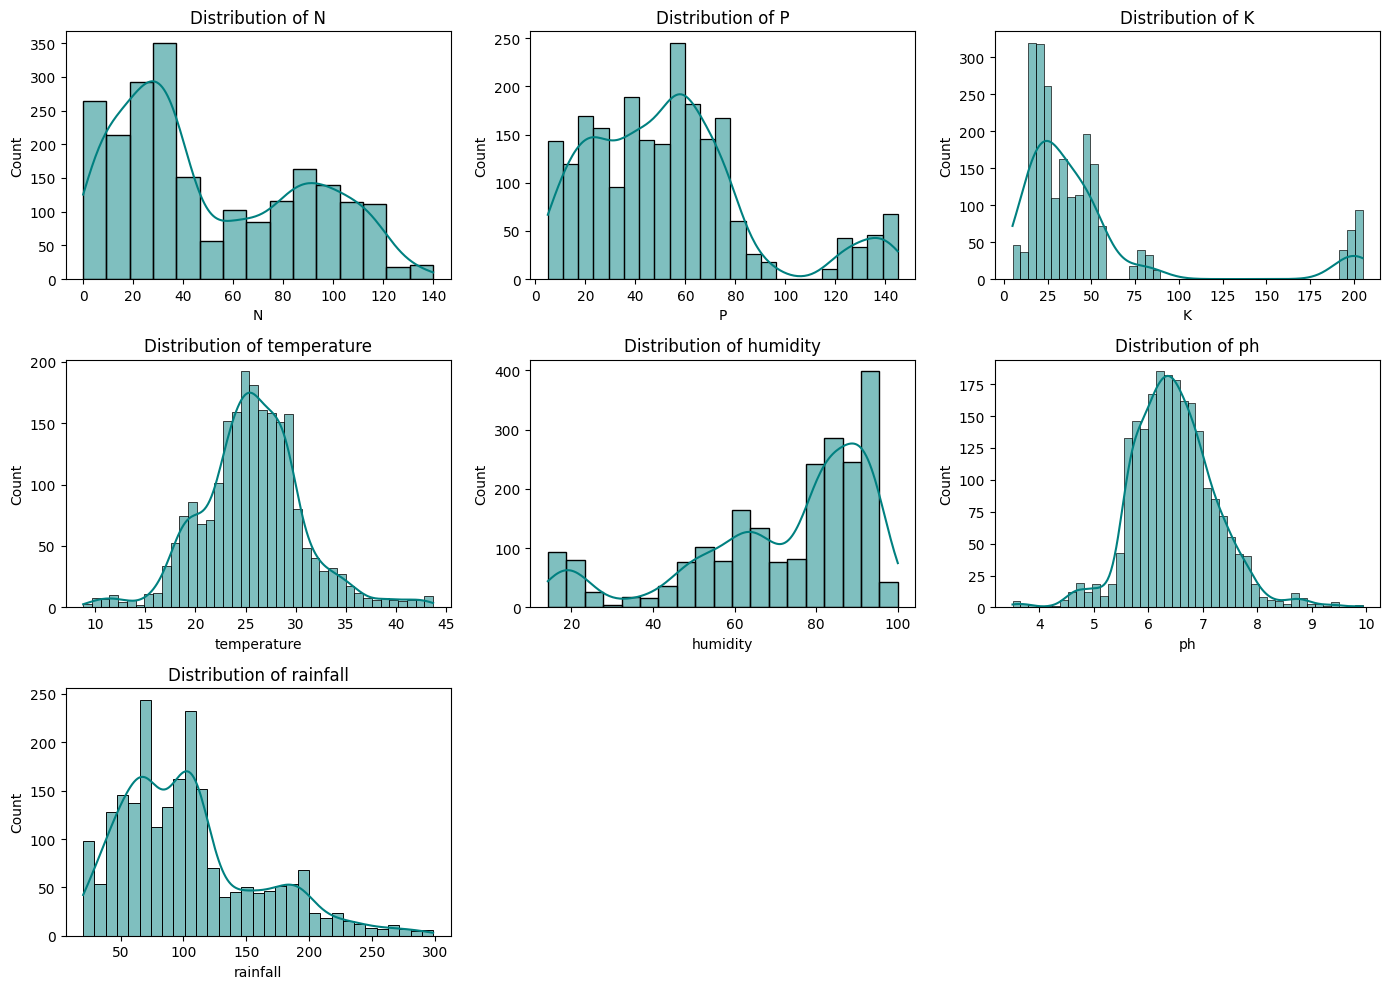

In [16]:
# Distribution of features
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

plt.figure(figsize=(14,10))
for i, col in enumerate(features, 1):
    plt.subplot(3,3,i)
    sns.histplot(df[col], kde=True, color="teal")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


From the distribution plots of the features, we can gain the following insights:

* **N (Nitrogen)**: The distribution of Nitrogen appears to be somewhat multimodal, with peaks at lower and higher values. This suggests that there might be different groups of crops with distinct nitrogen requirements.
* **P (Phosphorus)**: The Phosphorus distribution also shows multiple peaks, indicating varying phosphorus levels across the dataset, likely corresponding to different crop needs.
* **K (Potassium)**: The Potassium distribution is skewed to the right, with a large concentration of values at the lower end and a few crops requiring much higher levels.
* **Temperature**: The temperature distribution seems roughly bell-shaped, indicating a concentration of values around the mean temperature.
* **Humidity**: The humidity distribution is skewed towards higher values, with a significant number of observations having high humidity. There is also a smaller peak at lower humidity levels.
* **pH**: The pH distribution appears to be relatively normal (bell-shaped), centered around a neutral pH, with some spread towards more acidic and alkaline conditions.
* **Rainfall**: The rainfall distribution is skewed to the right, suggesting that while many areas have lower rainfall, some locations experience significantly higher amounts.

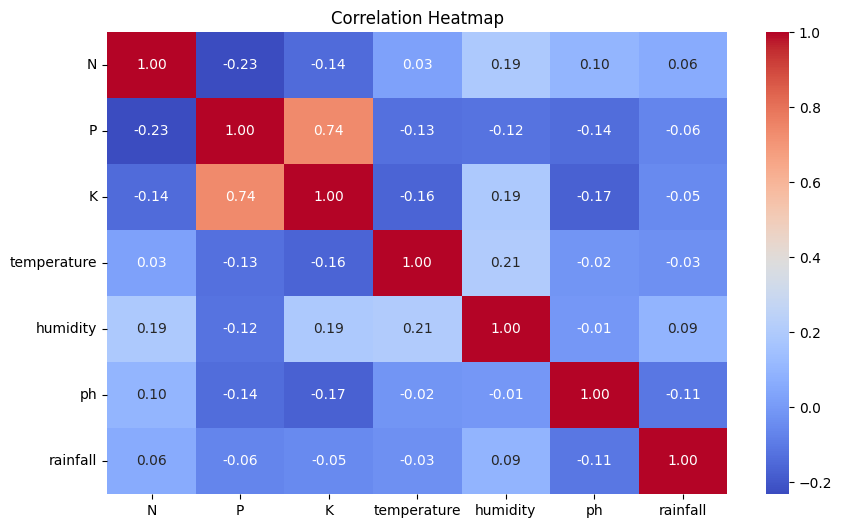

In [17]:
# Correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.drop('label', axis=1).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Based on the correlation heatmap, insights:

* **Moderate Positive Correlation between P and K**: There's a moderate positive correlation (0.74) between Phosphorus (P) and Potassium (K). This suggests that soils high in phosphorus tend to also be high in potassium, and vice-versa.
* **Moderate Negative Correlation between N and P, and N and K**: There are moderate negative correlations between Nitrogen (N) and Phosphorus (P) (-0.23), and Nitrogen (N) and Potassium (K) (-0.14). This indicates that as nitrogen levels increase, phosphorus and potassium levels tend to slightly decrease.
* **Weak Correlations**: Most other features (temperature, humidity, ph, and rainfall) show relatively weak correlations with each other and with N, P, and K. The correlation coefficients are close to zero, suggesting that these features are largely independent of each other. For example, temperature has a weak positive correlation with humidity (0.21) but very weak correlations with N, P, K, pH, and rainfall.

/tmp/ipython-input-2714850676.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y=col, palette="viridis")
/tmp/ipython-input-2714850676.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y=col, palette="viridis")
/tmp/ipython-input-2714850676.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y=col, palette="viridis")
/tmp/ipython-input-2714850676.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variabl

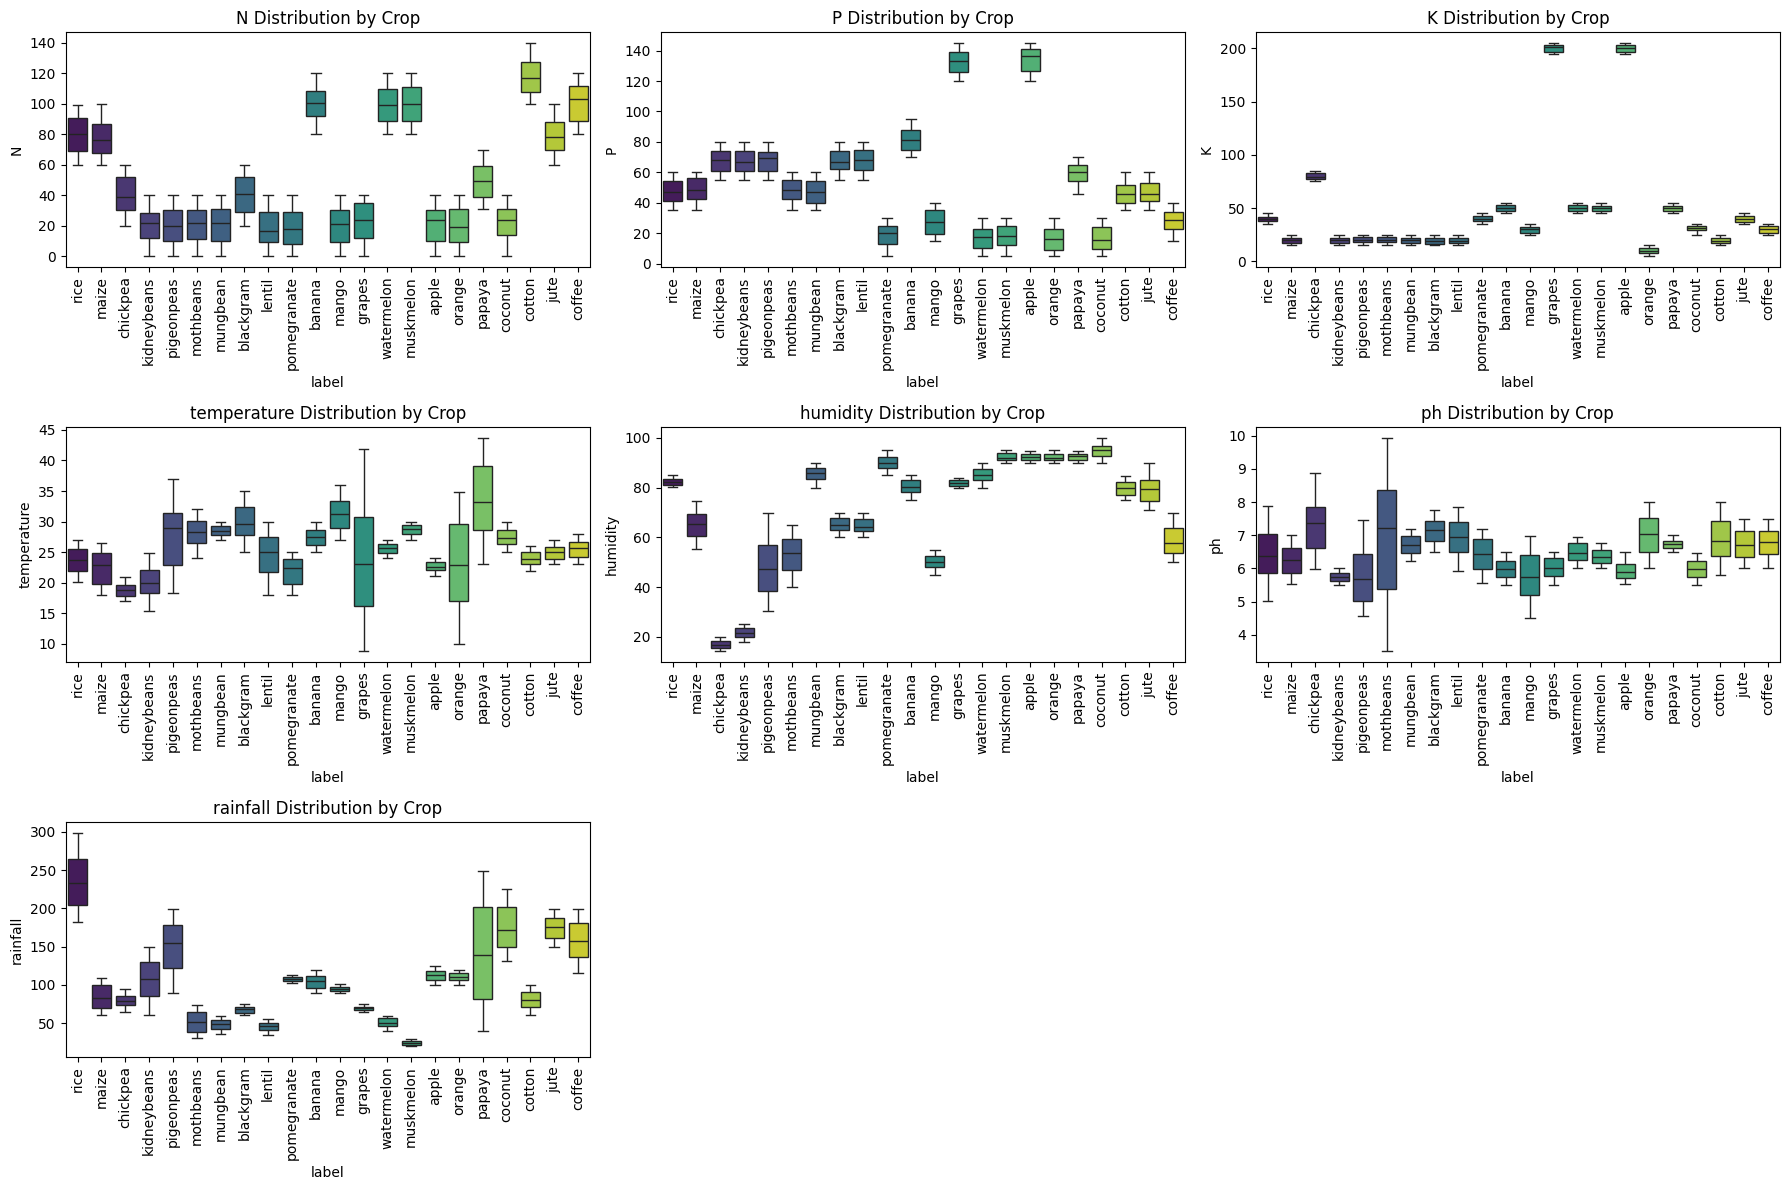

In [18]:
# Box plots of features vs. crop type
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

plt.figure(figsize=(18, 12))
for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x='label', y=col, palette="viridis")
    plt.xticks(rotation=90)
    plt.title(f'{col} Distribution by Crop')
plt.tight_layout()
plt.show()

The box plots show how the distribution of each nutrient (N, P, K), temperature, humidity, pH, and rainfall varies for each crop type. We can extract several insights from these visualizations:

* **Nutrients (N, P, K)**: Different crops have distinct requirements for Nitrogen (N), Phosphorus (P), and Potassium (K). For example, rice and cotton seem to require higher levels of N, while certain fruits like grapes and mangoes might thrive with different nutrient balances. Potassium levels show significant variation across crops, with some like banana and grapes showing higher median K values.
* **Temperature and Humidity**: These plots indicate the optimal temperature and humidity ranges for each crop. For instance, coffee appears to prefer a narrower temperature range compared to other crops. Humidity levels are generally high for many crops, but some like chickpea and kidneybeans seem to tolerate lower humidity.
* **pH**: The box plot for pH shows the preferred soil pH range for each crop. Most crops appear to grow in a slightly acidic to neutral pH range (around 6 to 7), but some like citrus fruits might tolerate more acidic conditions.
* **Rainfall**: The rainfall plot highlights the water requirements of different crops. Rice, for example, requires significantly higher rainfall compared to crops like chickpea or kidneybeans.


<Figure size 1200x600 with 0 Axes>

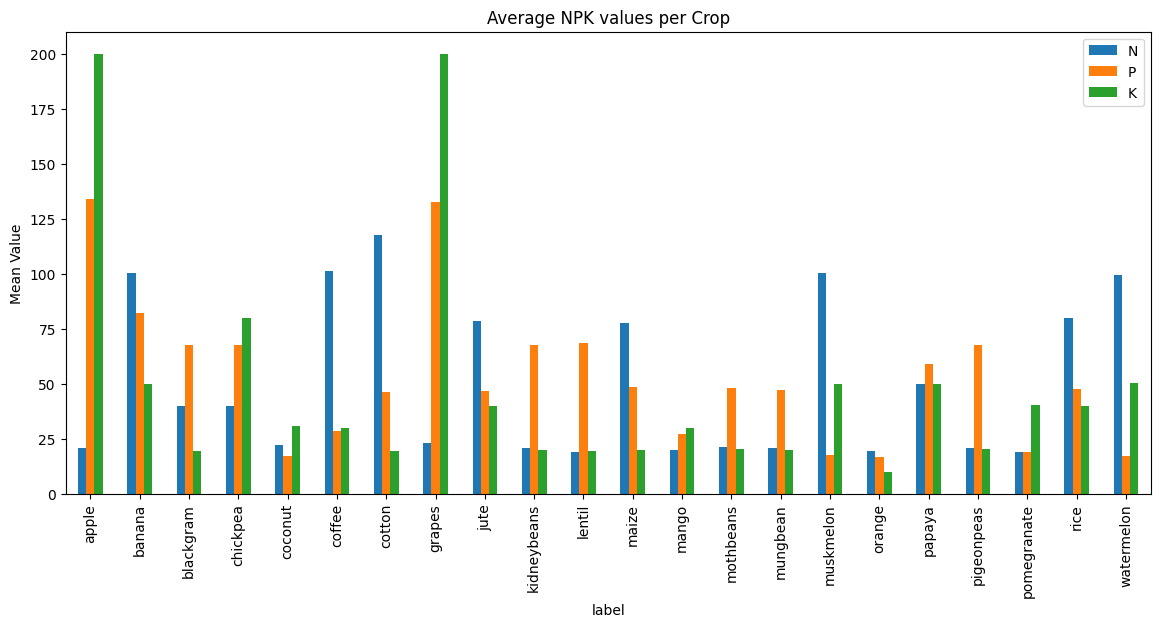

In [19]:
#  Average feature values by crop

plt.figure(figsize=(12,6))
avg_values = df.groupby("label")[['N','P','K']].mean()
avg_values.plot(kind="bar", figsize=(14,6))
plt.title("Average NPK values per Crop")
plt.ylabel("Mean Value")
plt.show()

The bar plot showing the average NPK values per crop provides clear insights into the nutrient needs of different crops. Here are some observations:

* **High Potassium (K) for Apple and Grapes**: Apple and grapes stand out with significantly higher average potassium levels compared to other crops. This suggests these fruits require a substantial amount of potassium for optimal growth.
* **High Nitrogen (N) for Certain Crops**: Crops like cotton, coffee, muskmelon, banana, and rice show relatively high average nitrogen levels. This indicates that nitrogen is a crucial nutrient for these crops.
* **Varied Phosphorus (P) Requirements**: Phosphorus levels vary across crops. Chickpea, kidneybeans, lentil, and pigeonpeas have relatively similar and moderate average phosphorus levels. Apple and grapes also show high phosphorus levels, similar to their potassium needs.
* **Low Nutrient Requirements for Some Crops**: Some crops, like orange and mango, appear to have lower average requirements for all three nutrients (N, P, and K) compared to others.
* **Distinct Nutrient Profiles**: Each crop generally has a distinct combination of average N, P, and K values, highlighting their specific nutritional needs. This differentiation is key for recommending the right crop based on soil nutrient levels.

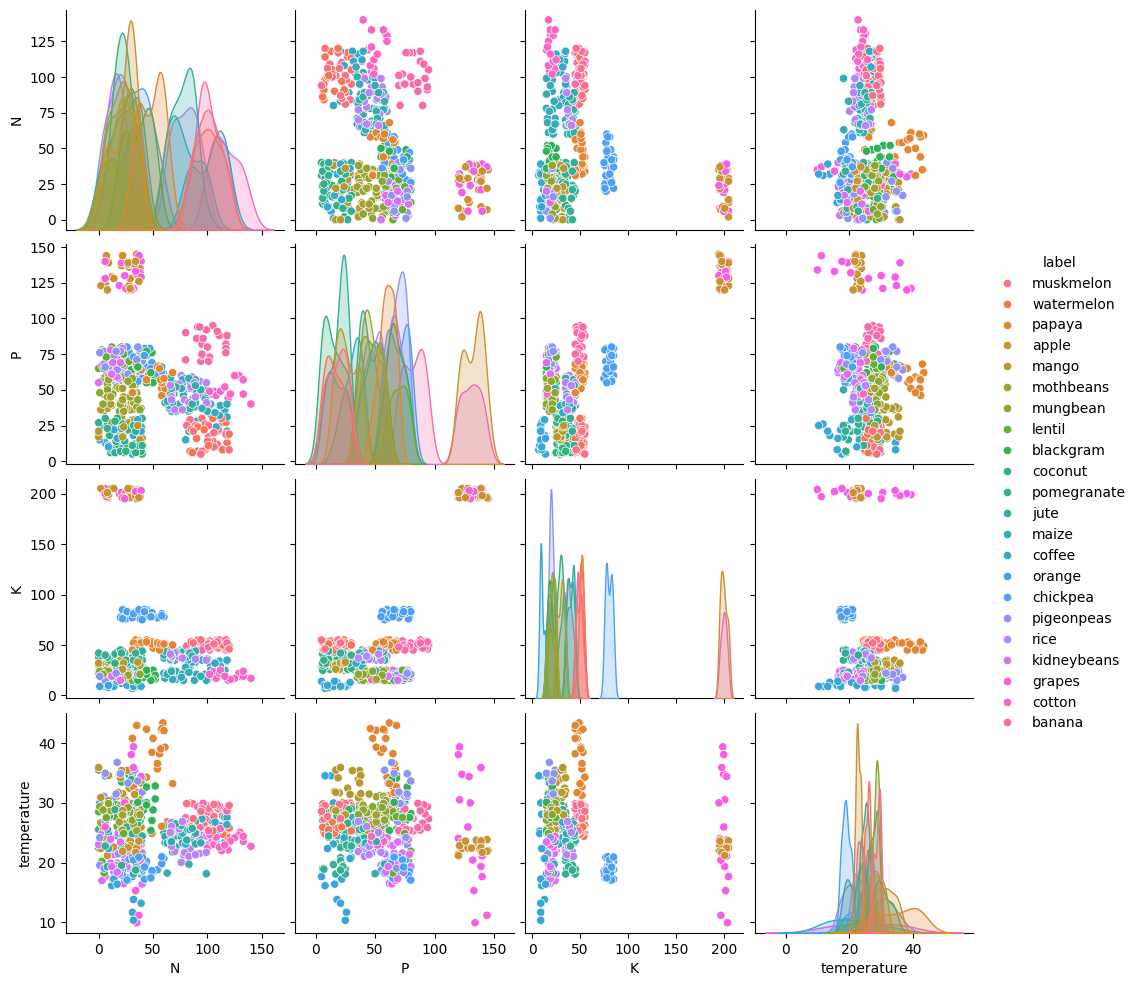

In [20]:
#  Pairplot (sample for visualization due to large dataset)
sample_df = df.sample(500, random_state=42)
sns.pairplot(sample_df, hue="label", vars=['N','P','K','temperature'])
plt.show()

The pair plot provides a visual exploration of the relationships between pairs of features (N, P, K, and temperature) and how these relationships vary across different crop types. Here are some insights from the pair plot:

* **Crop Clustering in Feature Space**: We can observe that different crop types tend to form distinct clusters or groups in the scatter plots. This indicates that combinations of these features (N, P, K, and temperature) can help differentiate between different crops. For example, in the N vs. K scatter plot, several crops occupy clearly separated regions.
* **Separation based on N, P, and K**: The scatter plots involving N, P, and K show good separation for many crop types. This reinforces the importance of nutrient levels in determining suitable crops. Crops with similar nutrient requirements tend to cluster together.
* **Temperature's Role in Differentiation**: While temperature shows some variation across crops (as seen in the diagonal histograms and scatter plots involving temperature), its ability to separate crops appears less pronounced compared to the nutrient features (N, P, K). Some crops might have overlapping temperature ranges.
* **Relationships between Features**: The scatter plots also show the relationships between pairs of features. For instance, the P vs. K scatter plot shows a somewhat positive relationship, consistent with the correlation heatmap, and we can see how different crops are positioned along this relationship.
* **Potential for Classification**: The visible clustering of different crop types in the feature space suggests that these features are good predictors for crop recommendation and that a classification model could be built to predict the crop based on these environmental and nutrient parameters.

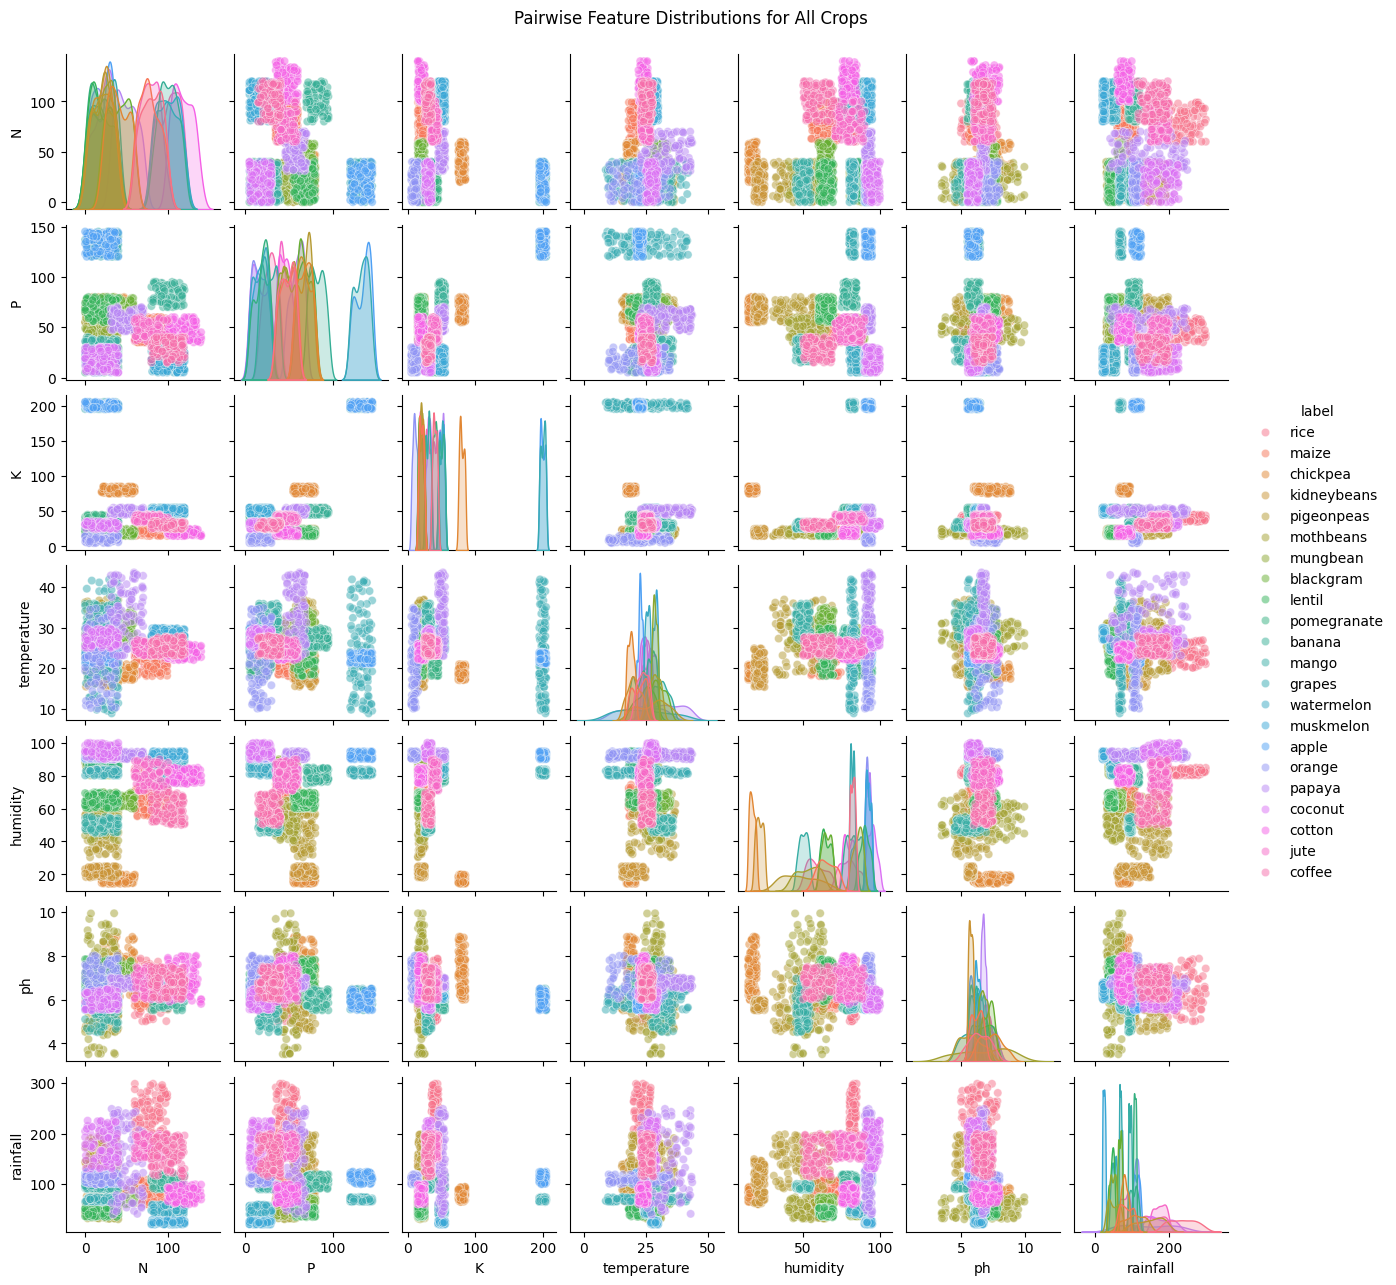

In [21]:
import warnings
warnings.filterwarnings("ignore")
sns.pairplot(df, hue='label', plot_kws={'alpha': 0.5}, height=1.8)
plt.suptitle("Pairwise Feature Distributions for All Crops", y=1.02)
plt.show()

The pair plot showing the pairwise feature distributions for all crops provides a wealth of visual information. Here are some key findings:

* **Clear Separation of Many Crop Types**: The most significant finding is that many crop types form distinct clusters in the scatter plots when considering pairs of features. This is particularly evident in plots involving N, P, and K. This strong separation suggests that the environmental and nutrient features are powerful predictors for differentiating between crops.
* **Importance of Nutrient Levels**: The scatter plots involving N, P, and K show clear groupings based on nutrient requirements. Crops with similar nutrient needs tend to cluster together, while those with very different needs are well-separated. This reinforces the insights gained from the average NPK bar plot.
* **Temperature, Humidity, pH, and Rainfall also Contribute to Separation**: While perhaps not as dramatic as the nutrient features, temperature, humidity, pH, and rainfall also contribute to the separation of certain crop types. For example, crops requiring high rainfall (like rice) are clearly separated in plots involving rainfall. Similarly, humidity and temperature show distinct ranges for some crops.
* **Multimodal Distributions on the Diagonal**: The diagonal plots show the distribution of each individual feature, colored by crop type. These often reveal multimodal distributions, indicating that different crops thrive in different ranges of these features. This aligns with the insights from the individual feature distribution plots.
* **Relationships Between Features (Revisited)**: The scatter plots also visually confirm the relationships between features observed in the correlation heatmap. For instance, the positive correlation between P and K is visible as a general upward trend in their scatter plot, with different crop clusters positioned along this trend.
* **Potential for High Classification Accuracy**: The visible separation and clustering of crop types in this high-dimensional feature space suggest that a classification model trained on these features is likely to achieve high accuracy in recommending crops.

## Feature Engineering

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from pandas.api.types import CategoricalDtype

In [23]:
def feature_engineer(df):
    df['NPK'] = (df['N'] + df['P'] + df['K']) / 3
    df['THI'] = df['temperature'] * df['humidity'] / 100
    df['rainfall_level'] = pd.cut(df['rainfall'],
                              bins=[0, 50, 100, 200, 300],
                              labels=['Low', 'Medium', 'High', 'Very High'])
    def ph_category(p):
        if p < 5.5:
            return 'Acidic'
        elif p <= 7.5:
            return 'Neutral'
        else:
            return 'Alkaline'

    df['ph_category'] = df['ph'].apply(ph_category)
    df['temp_rain_interaction'] = df['temperature'] * df['rainfall']
    df['ph_rain_interaction'] = df['ph'] * df['rainfall']

    return df

In [24]:
df_fe = feature_engineer(df)
df_fe.head()

,N,P,K,temperature,humidity,ph,rainfall,label,NPK,THI,rainfall_level,ph_category,temp_rain_interaction,ph_rain_interaction
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,58.333333,17.121963,Very High,Neutral,4237.241986,1319.686807
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,61.333333,17.485957,Very High,Neutral,4934.395694,1595.223513
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,53.000000,18.937446,Very High,Alkaline,6072.354751,2069.534380
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,49.666667,21.234829,Very High,Neutral,6433.734530,1695.288324
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,54.000000,16.427204,Very High,Alkaline,5288.545993,2004.132110


Convert ph_category from object to category type

In [27]:
ph_order = CategoricalDtype(categories=["Acidic", "Neutral", "Alkaline"], ordered=True)

df_fe["ph_category"] = df_fe["ph_category"].astype(ph_order)

Label Encoding and Test,Train,Split

In [30]:
X = df_fe.drop(columns='label', axis=1)
y = df_fe['label']
le_target = LabelEncoder()
y_enc = le_target.fit_transform(y)

#Split X and y_enc using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, train_size=0.8, test_size=0.2, random_state=42, stratify=y_enc)

In [34]:
# Select only numerical columns for scaling
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['category', 'object']).columns

# Option 1: StandardScaler
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Apply one-hot encoding to categorical columns
X_train = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)

#### Train RandomForestClassifier

In [35]:
# Initialize model
rf_clf = RandomForestClassifier(
    n_estimators=200,       # number of trees (you can tune this)
    max_depth=None,         # let trees grow until pure
    random_state=42,
    class_weight="balanced" # helps if data imbalance
)

# Train the model
rf_clf.fit(X_train, y_train)

# Predictions
y_pred = rf_clf.predict(X_test)

#### Evaluate Model

Accuracy: 0.9954545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        2

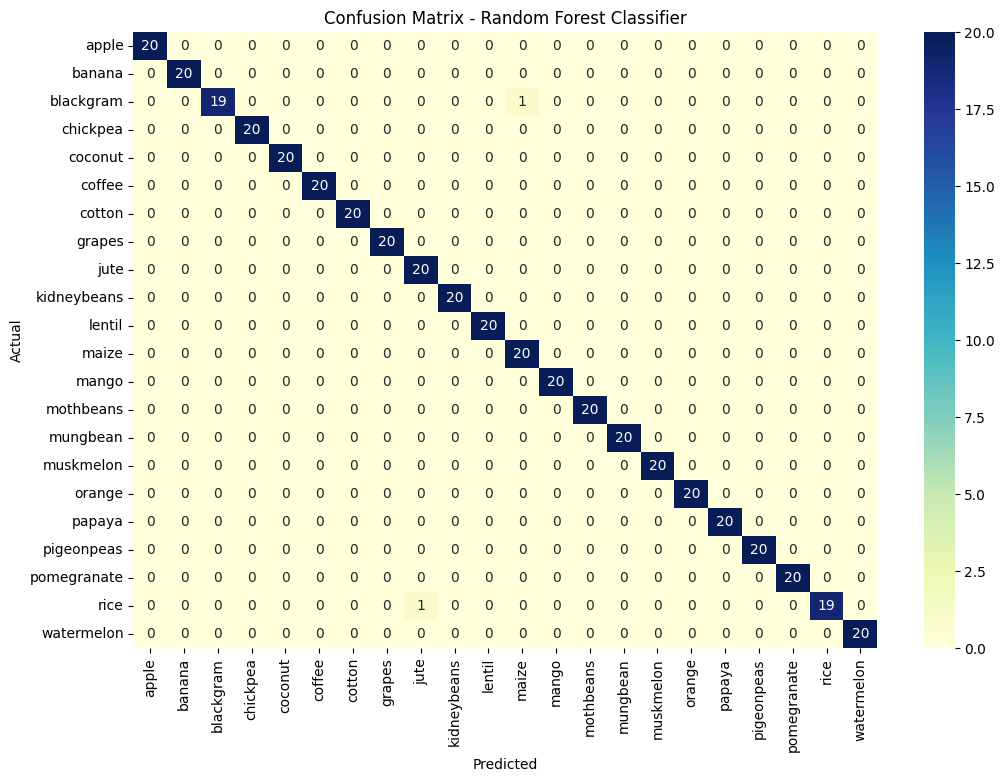

In [37]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed report
print(classification_report(y_test, y_pred, target_names=le_target.classes_))

# Confusion Matrix
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt="d",
            cmap="YlGnBu",
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_)
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

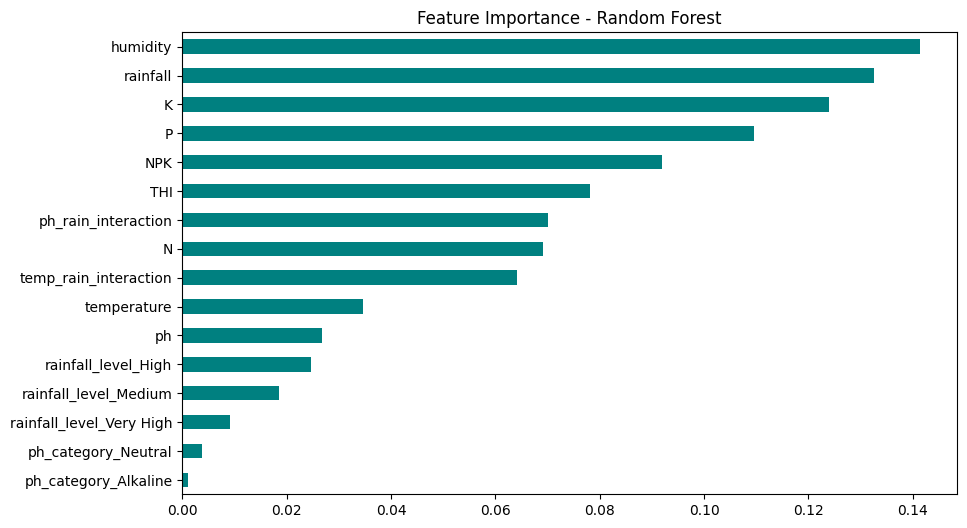

In [40]:
feat_importances = pd.Series(rf_clf.feature_importances_, index=X_train.columns)
feat_importances = feat_importances.sort_values(ascending=True)

plt.figure(figsize=(10,6))
feat_importances.plot(kind="barh", color="teal")
plt.title("Feature Importance - Random Forest")
plt.show()


---

## Insights on Feature Contributions

### 1. **Top Contributors**

* **Humidity & Rainfall** (highest importance):

  * These dominate crop recommendation, meaning climate conditions (moisture & water availability) are the **primary drivers** in deciding which crop grows best.
  * E.g., rice thrives under high humidity and rainfall, while chickpea prefers drier conditions.

* **Soil Nutrients (K, P, NPK, P, N)**:

  * Potassium (K) and Phosphorus (P) stand out as critical nutrients.
  * This reflects real agronomy: some crops (like fruits) demand high K, while legumes balance nitrogen naturally.

---

### 2. **Moderate Contributors**

* **THI (Temperature-Humidity Index)**:

  * Captures **heat stress conditions** that affect crop choice.
  * Important for crops like coffee or cotton, which are sensitive to combined heat & humidity.

* **Interaction Features (ph\_rain\_interaction, temp\_rain\_interaction)**:

  * Show that **combinations matter**: not just rainfall, but rainfall with pH or temperature influences crop suitability.

* **Temperature & pH**:

  * Independently less important than rainfall/humidity, but still influential.
  * Crops like wheat prefer cooler temperatures, while citrus fruits tolerate acidic soils.

---

### 3. **Lower Contributors**

* **Categorical Rainfall Levels (High, Medium, Very High)**:

  * Less impactful compared to continuous rainfall data.
  * The model relies more on the raw rainfall feature.

* **ph\_category (Acidic, Neutral, Alkaline)**:

  * Low importance, since raw `ph` already provides continuous, more precise information.

---

## Key Takeaways

1. **Water availability (humidity & rainfall)** is the most decisive factor for crop recommendation.
2. **Soil fertility (K, P, N)** comes next, confirming that nutrient balance strongly dictates crop suitability.
3. **Interactions (temp × rain, pH × rain)** capture complex conditions where crops succeed or fail.
4. **Categorical engineered features** add less value compared to continuous raw features (rainfall, pH).

This suggests that **climate + soil nutrients together** drive crop success more than individual factors in isolation.

---
